##Introduction

"Every strike brings me closer to the next home run." - Babe Ruth

Every team in the MLB would like to make it to the playoffs but the Toronto Blue Jays are on a tight budget and has asked us to figure out how to succeed in scouting players so that they have a better chance in the playoffs with the limitations.

###Data and Library Import

Here we import all the necessary Libraries as well as the dataset from Google Drive.

In [1]:
import pandas as pd
import numpy as np
import datetime
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels import regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive


In [0]:
baseball_df=pd.read_csv('/content/Drive/My Drive/baseball.csv',low_memory=False)

##Data Examination

In [4]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [5]:
baseball_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [6]:
baseball_df.tail()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


In [7]:
#checking how many values in the data are Null
baseball_df.isna().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

The following list explains what each column represents in the dataset

1. RS — Runs Scored
2. RA — Runs Allowed
3. W — Wins
4. OBP — On Base Percentage
5. SLG — Slugging Percentage
6. BA — Batting Average
7. Playoffs — Whether a team made it to playoffs or not
8. OOBP — Opponent’s On Base Percentage
9. OSLG — Opponents Slugging Percentage
10. G - Games played

OBP — On Base Percentage: This is a statistic measuring how frequently a batter reaches base, it does not take into account how far the batter runs i.e. third base.


SLG — Slugging Percentage: A measure of the batting ‘Productivity’, in simple terms, it measures how far a batter makes it when they hit the ball.


BA — Batting Average: Defined by the number of hits divided by at bats, measures how likely a batter is to hit a ball when pitched. Again, does not take into account how far the batter runs.

In [0]:
#run difference
baseball_df['RD']=baseball_df['RS']-baseball_df['RA']

In [0]:
baseball_df=baseball_df[baseball_df.Year>2000]

In [10]:
baseball_df.shape

(360, 16)

We added a new coolumn named RD which represents Run Difference between RS and RA and filtered the years to the last 20 years.

##Data Exploration

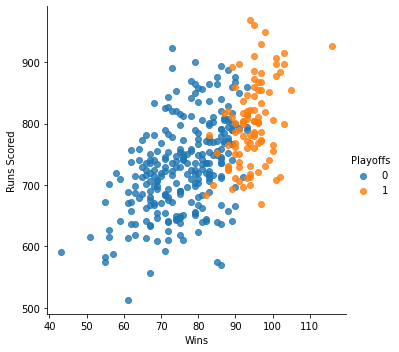

In [11]:
sb.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=baseball_df)
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.show()

In [12]:
baseball_df['W'].corr(baseball_df['RS'])

0.57850158545511

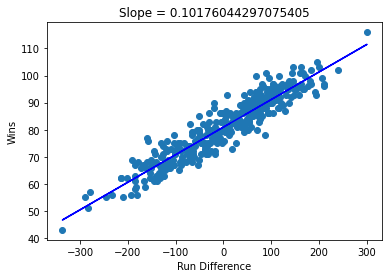

In [13]:
x = np.array(baseball_df.RD)
y = np.array(baseball_df.W)
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.scatter(baseball_df.RD, baseball_df.W)
plt.plot(x, abline_values,'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

In [14]:
baseball_df['W'].corr(baseball_df['RD'])

0.9386297182521279

In [15]:
baseball_df[['W','RS','RD']].describe()

,W,RS,RD
count,360.000000,360.000000,360.000000
mean,80.963889,748.177778,0.000000
std,11.725330,78.933960,108.153455
min,43.000000,513.000000,-337.000000
25%,72.000000,697.000000,-79.750000
50%,82.000000,743.000000,7.000000
75%,90.000000,801.250000,81.000000
max,116.000000,968.000000,300.000000


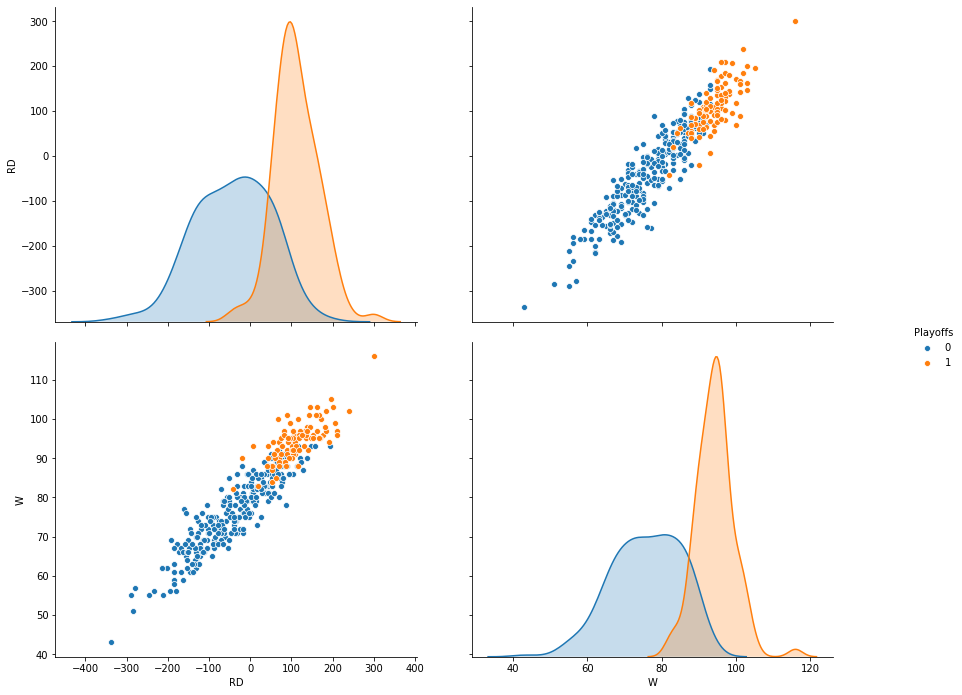

In [16]:
corrcheck = baseball_df[['RD', 'W', 'Playoffs']].copy()
g = sb.pairplot(corrcheck, hue = 'Playoffs',vars=["RD", "W"])
g.fig.set_size_inches(14,10)

In [17]:
corrcheck.corr(method='pearson')

,RD,W,Playoffs
RD,1.000000,0.938630,0.636653
W,0.938630,1.000000,0.698498
Playoffs,0.636653,0.698498,1.000000


##test/model

In [0]:
podesta = baseball_df[['OBP','SLG','BA','RS']]

In [19]:
podesta

,OBP,SLG,BA,RS
0,0.328,0.418,0.259,734
1,0.320,0.389,0.247,700
2,0.311,0.417,0.247,712
3,0.315,0.415,0.260,734
4,0.302,0.378,0.240,613
...,...,...,...,...
355,0.342,0.460,0.266,799
356,0.339,0.441,0.270,814
357,0.320,0.388,0.258,672
358,0.344,0.471,0.275,890


In [20]:
podesta.corr()

,OBP,SLG,BA,RS
OBP,1.000000,0.761706,0.829639,0.877979
SLG,0.761706,1.000000,0.738862,0.911354
BA,0.829639,0.738862,1.000000,0.795126
RS,0.877979,0.911354,0.795126,1.000000


BA : -1901.548137978777
SLG : 1159.4853943102507
OBP : 4479.074267941916


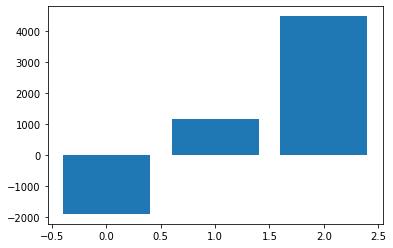

In [33]:
in_base=baseball_df[['BA','SLG','OBP']] # independent
de_base=baseball_df['RD']

model = LinearRegression()
# fit the model
model.fit(in_base, de_base)
# get importance
importance = model.coef_

for x, y in zip(importance,in_base.columns):
  print(y,':',x)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [29]:
importance.shape

(3,)

##Model

In [36]:
x = baseball_df[['OBP','SLG']].values
y = baseball_df[['RS']].values 
Runs = LinearRegression() 
Runs.fit(x,y)
print(Runs.intercept_) 
print(Runs.coef_)

[-863.98570627]
[[2629.98262323 1782.74782661]]


In [37]:
x = baseball_df[['OOBP','OSLG']].values
y = baseball_df[['RA']].values
RunsAllowed = LinearRegression()
RunsAllowed.fit(x,y)
 
print(RunsAllowed.intercept_)
print(RunsAllowed.coef_)

[-857.69785009]
[[2789.36554242 1641.90047463]]


In [38]:
x = baseball_df[['RD']].values
y = baseball_df[['W']].values
Wins = LinearRegression()
Wins.fit(x,y)
 
print(Wins.intercept_)
print(Wins.coef_)

[80.96388889]
[[0.10176044]]
